# 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing data

In [2]:
path = r'/Users/marcela/Achievement 4'

In [3]:
# Importing dataset departments_wrangled
df_depts=pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))
df_depts.shape

(21, 2)

In [4]:
# Importing dataset orders_products_active
ords_prods_active=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_active.pkl'))
ords_prods_active.shape

(30992664, 34)

# 03. Additional settings

In [5]:
# Set the maximum number of rows and columns Pandas will display
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [6]:
# Change the floating number format to display with two decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

In [7]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# 04. Merging Departments with main dataset

In [8]:
# Checking
df_depts.head(5)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [9]:
# Renaming unnamed column to department_id
df_depts.rename (columns = {'Unnamed: 0' : 'department_id'}, inplace = True)
df_depts.head(5)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [10]:
# Merge 'ords_prods_active' with 'df_depts' on 'department_id' to add department names to the orders
df_opd = ords_prods_active.merge(df_depts, on='department_id', indicator='merge_indicator')

In [11]:
# Checking value counts of _merge
df_opd['_merge'].value_counts()

_merge
both          30992664
left_only            0
right_only           0
Name: count, dtype: int64

In [12]:
df_opd.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,order_frequency,order_frequency_flag,first_name,surname,gender,state,age,date_joined,num_of_dependants,marital_status,income,regional_flag,Customer_activity,department,merge_indicator
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77,7,9.00,Mid-range product,Regularly busy,Average orders,10,New customer,6.37,low spender,20.50,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Active,beverages,both
1,2398795,1,2,3,7,15.00,196,1,1,both,Soda,77,7,9.00,Mid-range product,Least busy,Average orders,10,New customer,6.37,low spender,20.50,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Active,beverages,both
2,473747,1,3,3,12,21.00,196,1,1,both,Soda,77,7,9.00,Mid-range product,Least busy,Average orders,10,New customer,6.37,low spender,20.50,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Active,beverages,both
3,2254736,1,4,4,7,29.00,196,1,1,both,Soda,77,7,9.00,Mid-range product,Least busy,Average orders,10,New customer,6.37,low spender,20.50,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Active,beverages,both
4,431534,1,5,4,15,28.00,196,1,1,both,Soda,77,7,9.00,Mid-range product,Least busy,Average orders,10,New customer,6.37,low spender,20.50,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Active,beverages,both


# 05. Distribution of profiles

## User Profile for Age groups

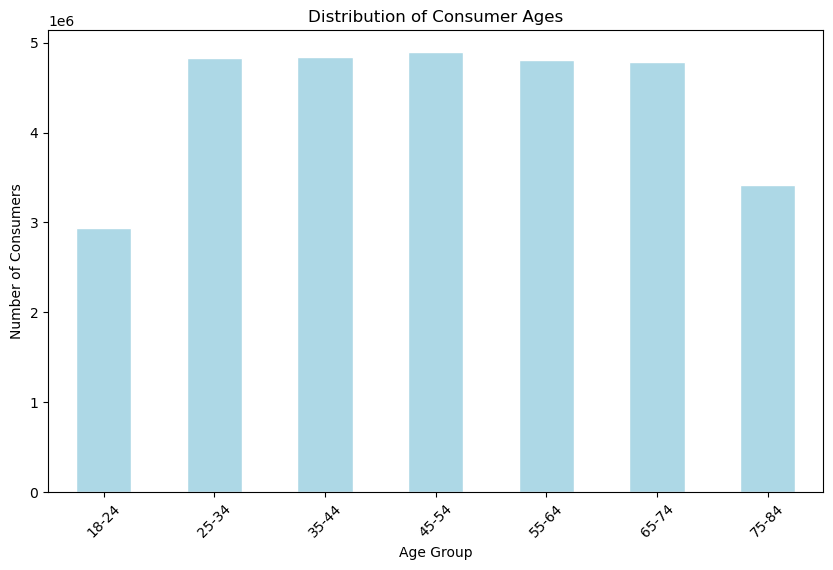

In [13]:
# Define the age bins for grouping
bins = [18, 24, 34, 44, 54, 64, 74, 84]

# Create a new column in the DataFrame to categorize each age into an age group
df_opd['age_group'] = pd.cut(df_opd['age'], bins, labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84'])

# Create a bar plot using the new 'age_group' column
plt.figure(figsize=(10, 6))  
age_group_histogram = df_opd['age_group'].value_counts().sort_index().plot.bar(
    color='lightblue', edgecolor='white'
)

# Set the title and axis labels
age_group_histogram.set_title('Distribution of Consumer Ages')
age_group_histogram.set_xlabel('Age Group')
age_group_histogram.set_ylabel('Number of Consumers')
plt.xticks(rotation=45)

# Save the bar plot as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_histogram.png'))

# Display the plot
plt.show()

In [14]:
def categorize_age(age):
    if 18 <= age < 28:
        return '18_27'
    elif 28 <= age < 38:
        return '28_37'
    elif 38 <= age < 48:
        return '38_47'
    elif 48 <= age < 58:
        return '48_57'
    elif 58 <= age < 68:
        return '58_67'
    elif age >= 68:
        return '68_over'
    else:
        return 'Other'

# Apply the function to create the age_group column
df_opd['age_group'] = df_opd['age'].apply(categorize_age)

# Checking for NaN values and the distribution of age groups
df_opd['age_group'].value_counts(dropna=False)

age_group
68_over    6809421
48_57      4900542
18_27      4860084
38_47      4850903
28_37      4835742
58_67      4735972
Name: count, dtype: int64

In [15]:
# Setting a random seed for reproducibility
np.random.seed(4)

# Splitting the data into 70% and 30%
df_opd_big = df_opd.sample(frac=0.7)
df_opd_small = df_opd.drop(df_opd_big.index)

# Quality check to ensure the total length matches the original DataFrame
len(df_opd_big) + len(df_opd_small) == len(df_opd)

True

In [16]:
len(df_opd_big)

21694865

In [17]:
len(df_opd_small)

9297799

In [18]:
# Quality check of main dataset
len(df_opd)

30992664

# Age Group: Profile and Visualizations

In [19]:
# user_profile of subset of 30% sample df_opd_small only containing necessary columns for analysis
df_opd_group_sample = df_opd_small[['age', 'regional_flag', 'age_group', 'orders_day_of_week', 'order_hour_of_day', 'department', 'prices', 'order_id']]
df_opd_group_sample.shape

(9297799, 8)

In [20]:
# Define the categorize_age function
def categorize_age(age):
    if 18 <= age < 28:
        return '18_27'
    elif 28 <= age < 38:
        return '28_37'
    elif 38 <= age < 48:
        return '38_47'
    elif 48 <= age < 58:
        return '48_57'
    elif 58 <= age < 68:
        return '58_67'
    elif age >= 68:
        return '68_over'
    else:
        return 'Other'

# Apply the function to create the 'age_group' column
df_opd_small['age_group'] = df_opd_small['age'].apply(categorize_age)

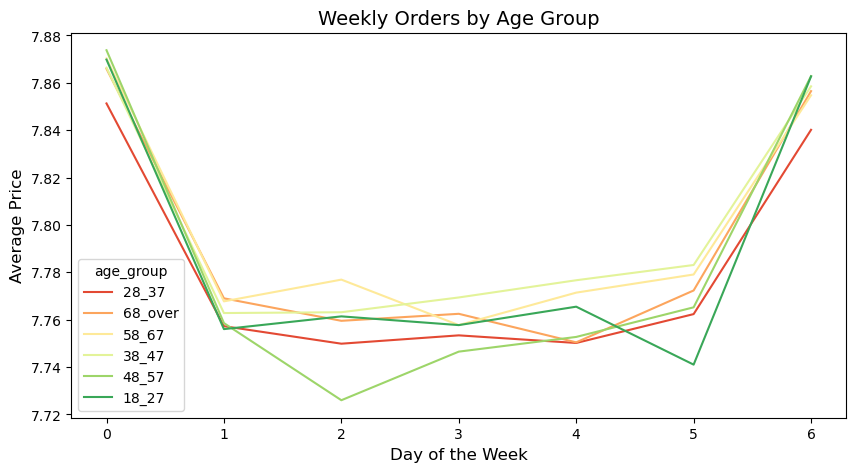

In [21]:
# Setting the figure size for better visibility
plt.figure(figsize=(10, 5))

# Creating the line plot
sns.lineplot(data=df_opd_group_sample, 
             x='orders_day_of_week', 
             y='prices', 
             hue='age_group', 
             palette='RdYlGn',
             ci=None)

# Adding a title and labels
plt.title("Weekly Orders by Age Group", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Average Price", fontsize=12) 

# Saving the figure and showing the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Age_group_dow.png'))
plt.show()

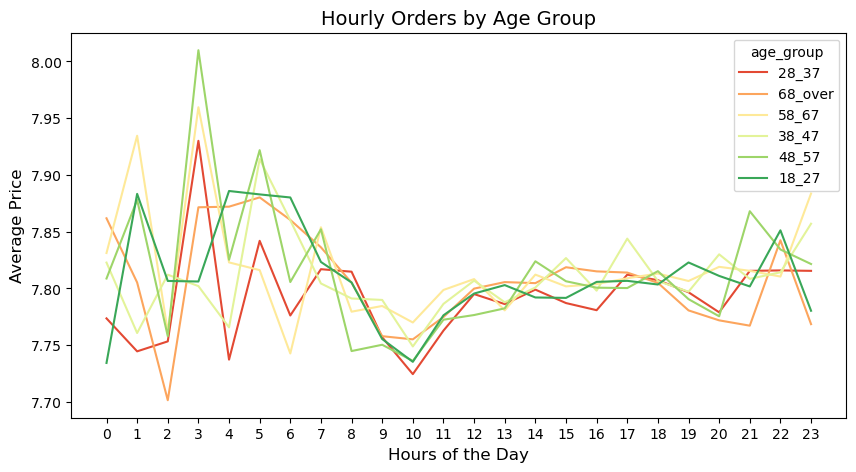

In [22]:
# Setting the figure size for better visibility
plt.figure(figsize=(10, 5))

# Creating the line plot
sns.lineplot(data=df_opd_group_sample, 
             x='order_hour_of_day', 
             y='prices', 
             hue='age_group', 
             palette='RdYlGn',
             ci=None)

# Adding a title and labels
plt.title("Hourly Orders by Age Group", fontsize=14)
plt.xlabel("Hours of the Day", fontsize=12)
plt.ylabel("Average Price", fontsize=12) 

# Ensure the x-axis labels represent hours clearly
plt.xticks(range(0, 24))  

# Saving the figure and showing the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Age_group_HOD.png'))
plt.show()

# Age Group: Regional Flag and Department Analysis

In [23]:
# Aggregating 'order_id' and 'prices' from the sample
df_opd_group_sample_agg = df_opd_group_sample.groupby(['department', 'age_group', 'regional_flag'], as_index=False).agg({'order_id': 'count', 'prices': 'sum'})

# Displaying the first 3 rows of the aggregated DataFrame
df_opd_group_sample_agg.head(3)

,department,age_group,regional_flag,order_id,prices
0,alcohol,18_27,Midwest,1799,14676.00
1,alcohol,18_27,Northeast,1125,9032.10
2,alcohol,18_27,South,2501,20850.90


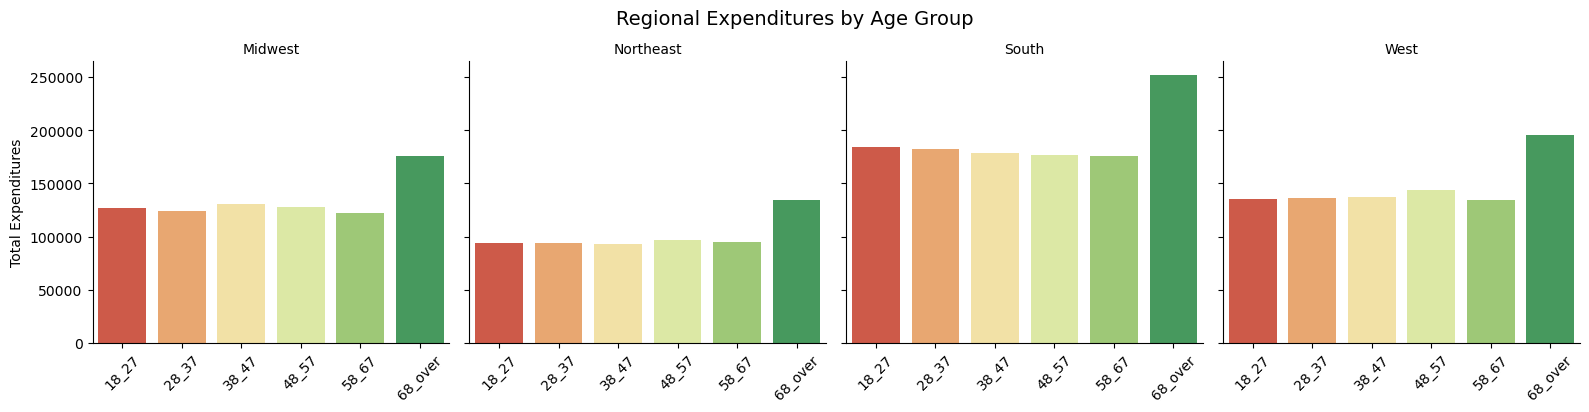

In [24]:
# Creating a FacetGrid for age_group and Revenue
g = sns.FacetGrid(df_opd_group_sample_agg, col="regional_flag", height=4, aspect=1)
g.map(sns.barplot, "age_group", "prices", palette='RdYlGn', ci=None, order=['18_27', '28_37', '38_47', '48_57', '58_67', '68_over'])

# Setting axis labels and titles
g.set_axis_labels("", "Total Expenditures")
g.set_titles("{col_name}")  # Setting title for each subplot

# Rotating the x-axis labels for better readability
g.set_xticklabels(rotation=45)

# Adjusting the main title
g.fig.suptitle("Regional Expenditures by Age Group", fontsize=14)
plt.subplots_adjust(top=0.85)  # Adjust top spacing to accommodate the main title

# Displaying the plot
plt.show()

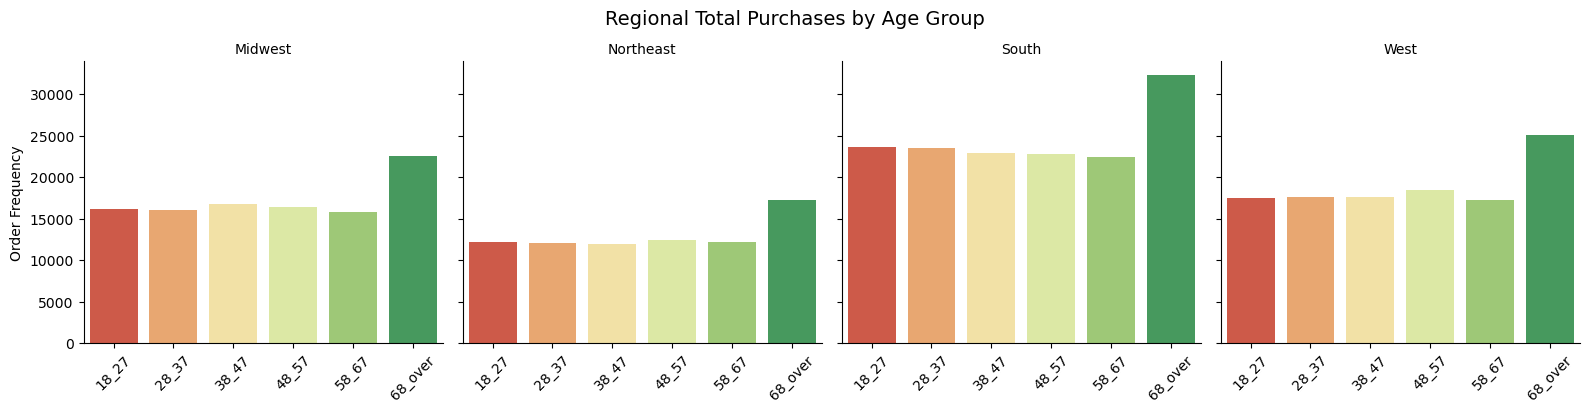

In [25]:
# Creating a FacetGrid for age_group and Total Purchases
g = sns.FacetGrid(df_opd_group_sample_agg, col="regional_flag", height=4, aspect=1)
g.map(sns.barplot, "age_group", "order_id", palette='RdYlGn', ci=None, order=['18_27', '28_37', '38_47', '48_57', '58_67', '68_over'])

# Setting axis labels and titles
g.set_axis_labels("", "Order Frequency")
g.set_titles("{col_name}")  # Setting title for each subplot

# Rotating the x-axis labels for better readability
g.set_xticklabels(rotation=45)

# Adjusting the main title
g.fig.suptitle("Regional Total Purchases by Age Group", fontsize=14)
plt.subplots_adjust(top=0.85)  # Adjust top spacing to accommodate the main title

# Displaying the plot
plt.show()

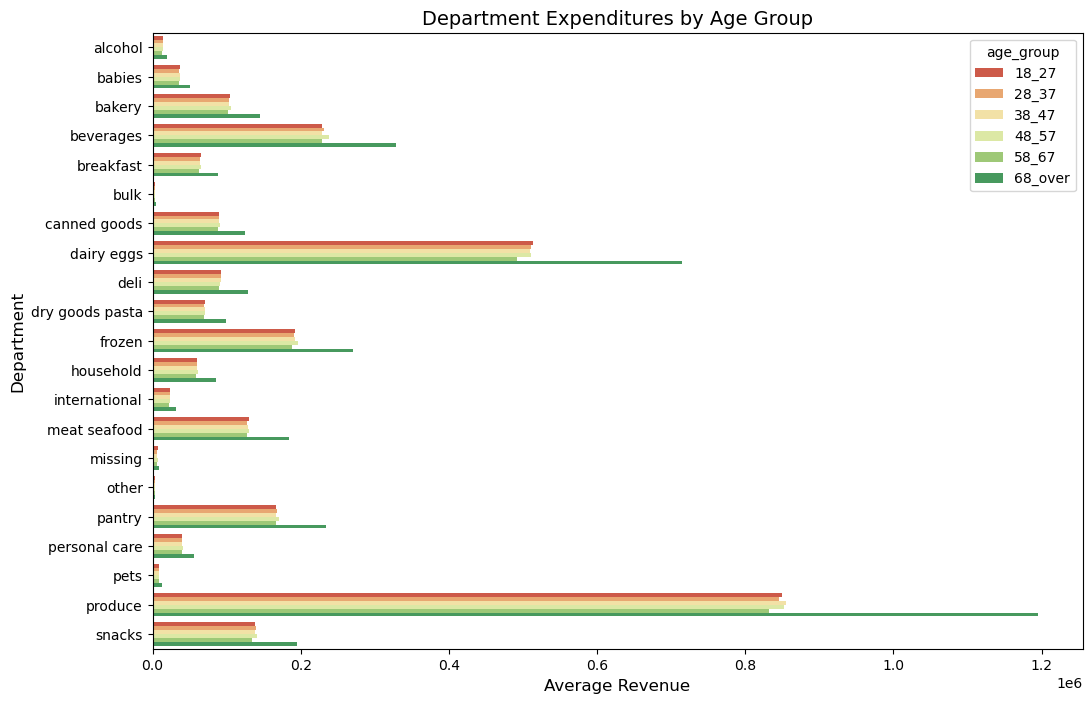

In [26]:
# Setting the figure size for better visibility
plt.figure(figsize=(12, 8))  # Adjust as needed based on the number of departments

# Creating the bar plot
sns.barplot(data=df_opd_group_sample_agg, 
             x='prices', 
             y='department',  # Ensure this is the correct column name
             hue='age_group', 
             palette='RdYlGn',
             estimator=np.mean,  
             ci=None)

# Adding a title and labels
plt.title("Department Expenditures by Age Group", fontsize=14)
plt.xlabel("Average Revenue", fontsize=12)  
plt.ylabel("Department", fontsize=12)

# Saving the figure and showing the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Age_group_department_Expenditures.png'))
plt.show()

<Figure size 700x1000 with 0 Axes>

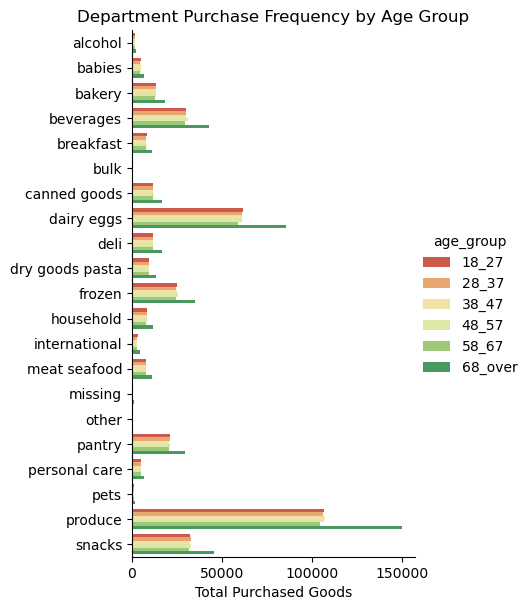

In [27]:
# Create a barplot to visualize department purchase frequency by age group
plt.figure(figsize=(7, 10))

sns.catplot(data=df_opd_group_sample_agg,
            kind="bar",
            x='order_id',
            y='department',
            hue='age_group',
            errorbar="sd",
            palette='RdYlGn',
            height=6,
            ci=None,
            hue_order=['18_27', '28_37', '38_47', '48_57', '58_67', '68_over'],
            aspect=0.8  # Adjust the aspect ratio as needed
            )

plt.title("Department Purchase Frequency by Age Group")
plt.xlabel("Total Purchased Goods")
plt.ylabel("")
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Age_group_freq_purchases.png'))
plt.show()

# 06. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [28]:
# Define the aggregation functions
aggregations = {
    'max_order': ['mean', 'max', 'min'],
    'prices': ['sum', 'mean', 'max', 'min']
}

# Group by 'age_group' and apply the aggregations
df_opd_grouped = df_opd.groupby('age_group').agg(aggregations)

# Rename the columns for clarity
df_opd_grouped.columns = ['Max_Order_Mean', 'Max_Order_Max', 'Max_Order_Min', 'Prices_Sum', 'Prices_Mean', 'Prices_Max', 'Prices_Min']

# Display the aggregated DataFrame
df_opd_grouped

,Max_Order_Mean,Max_Order_Max,Max_Order_Min,Prices_Sum,Prices_Mean,Prices_Max,Prices_Min
age_group,,,,,,,
18_27,34.52,99,5,37849504.80,7.79,25.00,1.00
28_37,34.38,99,5,37664820.80,7.79,25.00,1.00
38_47,34.30,99,5,37836786.50,7.80,25.00,1.00
48_57,34.65,99,5,38163746.50,7.79,25.00,1.00
58_67,34.25,99,5,36957974.30,7.80,25.00,1.00
68_over,34.44,99,5,53086601.90,7.80,25.00,1.00


# 07. Compare your customer profiles with regions and departments

## Income Group: Creating Flag for Income Groups

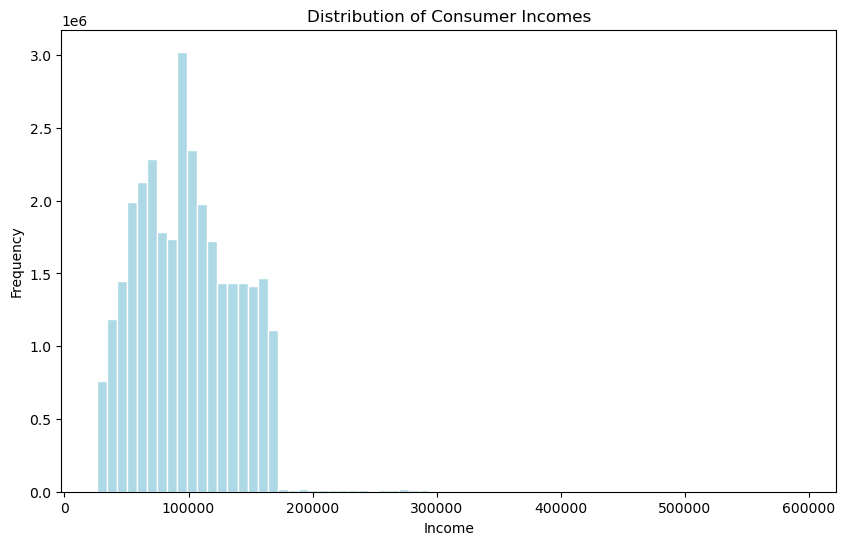

In [29]:
# Define plot parameters
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.hist(df_opd['income'], bins=70, color='lightblue', edgecolor='white')

# Set plot titles and labels
plt.title('Distribution of Consumer Incomes')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Save the plot as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_histogram.png'))

# Show the plot
plt.show()

In [30]:
# Descriptives of income column
df_opd['income'].describe()

count   30992664.00
mean       99673.22
std        43139.28
min        25903.00
25%        67289.00
50%        96765.00
75%       128101.00
max       593901.00
Name: income, dtype: float64

In [31]:
# Define income group thresholds
lowest_income_threshold = 67292
highest_income_threshold = 128102

# Create the income_group column using numpy's where function
df_opd['income_group'] = np.where(df_opd['income'] <= lowest_income_threshold, 'Lowest_income',
                                  np.where(df_opd['income'] < highest_income_threshold, 'Avg_income',
                                           'Highest_income'))

# Display the first 3 rows to check
df_opd.head(3)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,order_frequency,order_frequency_flag,first_name,surname,gender,state,age,date_joined,num_of_dependants,marital_status,income,regional_flag,Customer_activity,department,merge_indicator,age_group,income_group
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77,7,9.00,Mid-range product,Regularly busy,Average orders,10,New customer,6.37,low spender,20.50,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Active,beverages,both,28_37,Lowest_income
1,2398795,1,2,3,7,15.00,196,1,1,both,Soda,77,7,9.00,Mid-range product,Least busy,Average orders,10,New customer,6.37,low spender,20.50,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Active,beverages,both,28_37,Lowest_income
2,473747,1,3,3,12,21.00,196,1,1,both,Soda,77,7,9.00,Mid-range product,Least busy,Average orders,10,New customer,6.37,low spender,20.50,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Active,beverages,both,28_37,Lowest_income


In [32]:
# Creating 70/30 split for data sample
np.random.seed(4)
dev = np.random.rand(len(df_opd)) <= 0.7

# Store 70% of the sample in the df_opd_big and 30% in df_opd_small
df_opd_big2 = df_opd[dev]
df_opd_small2 = df_opd[~dev]

# Quality check
len(df_opd_big2)+len(df_opd_small2)

30992664

## Income Group: Profile Creation

In [33]:
# Define the list of necessary columns for analysis
columns_needed = ['regional_flag', 'income_group', 'orders_day_of_week', 'order_hour_of_day', 'department', 'prices', 'order_id']

# Ensure all columns exist in df_opd_small2
assert all(column in df_opd_small2.columns for column in columns_needed), "Some columns are missing."

# Creating a subset from df_opd_small2 with only necessary columns
df_income_group_sample = df_opd_small2[columns_needed]

# Display the first few rows of the subset
df_income_group_sample.head()

,regional_flag,income_group,orders_day_of_week,order_hour_of_day,department,prices,order_id
0,South,Lowest_income,2,8,beverages,9.00,2539329
2,South,Lowest_income,3,12,beverages,9.00,473747
3,South,Lowest_income,4,7,beverages,9.00,2254736
6,South,Lowest_income,1,9,beverages,9.00,550135
10,South,Lowest_income,1,14,beverages,13.40,3108588


## Income Group: Visualizations

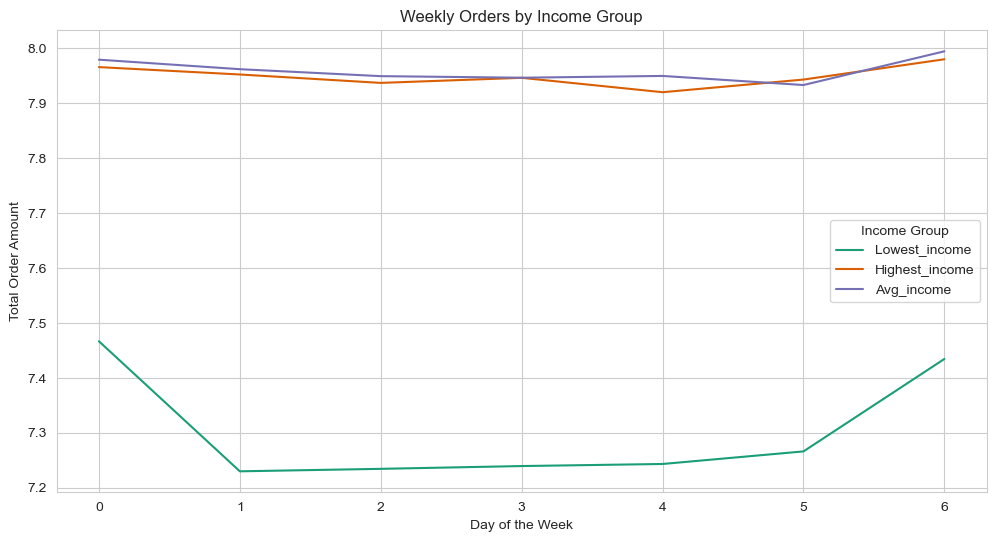

In [34]:
# Set the figure size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create the line chart
sns.lineplot(
    data=df_income_group_sample,
    x='orders_day_of_week',
    y='prices',
    hue='income_group',
    palette='Dark2',
    ci=None
)

# Add labels and title
plt.title("Weekly Orders by Income Group")
plt.xlabel("Day of the Week")
plt.ylabel("Total Order Amount")

# Add a legend
plt.legend(title="Income Group")

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Income_group_dow.png'))

# Display the chart
plt.show()

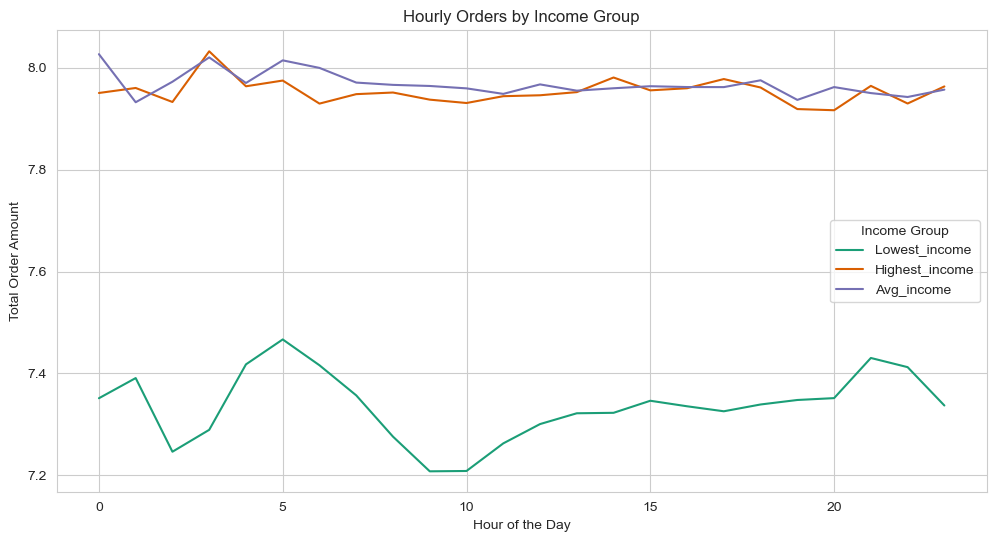

In [35]:
# Set the figure size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create the line chart
sns.lineplot(
    data=df_income_group_sample,
    x='order_hour_of_day',
    y='prices',
    hue='income_group',
    palette='Dark2',
    ci=None
)

# Add labels and title
plt.title("Hourly Orders by Income Group")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Order Amount")

# Add a legend
plt.legend(title="Income Group")

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Income_group_HOD.png'))

# Display the chart
plt.show()

## Income Group: Regional Flag and Department Analysis

In [36]:
# Aggregating 'order_id' and 'prices' from the sample data
# based on department, income group, and regional flag

df_income_group_sample_agg = df_income_group_sample.groupby(['department', 'income_group', 'regional_flag'], as_index=False).agg({'order_id': 'count', 'prices': 'sum'})
df_income_group_sample_agg.head(3)

,department,income_group,regional_flag,order_id,prices
0,alcohol,Avg_income,Midwest,4798,39885.10
1,alcohol,Avg_income,Northeast,3166,25333.70
2,alcohol,Avg_income,South,7069,59783.70


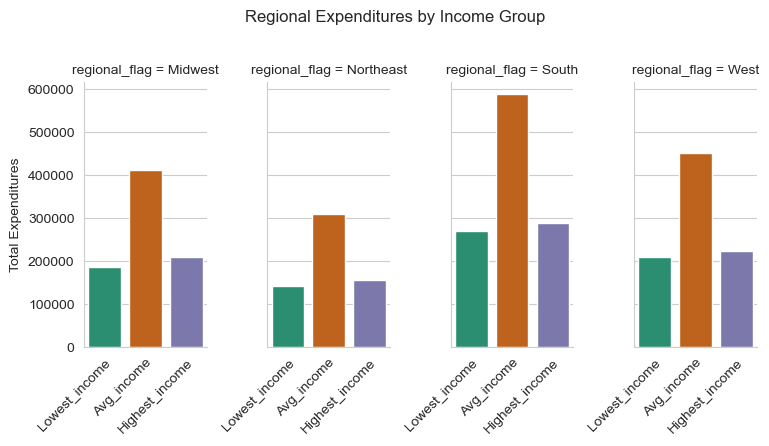

In [37]:
# Creating a FacetGrid for income_group and Revenue, with separate plots for regional_flag

g = sns.FacetGrid(df_income_group_sample_agg, col="regional_flag", height=4, aspect=.5)
g.map(sns.barplot, "income_group", "prices", palette='Dark2', ci=None, order=['Lowest_income', 'Avg_income', 'Highest_income'])

g.set_xticklabels(rotation=45, rotation_mode='anchor', ha='right')
g.set_axis_labels("", "Total Expenditures")
g.fig.suptitle("Regional Expenditures by Income Group")
g.figure.subplots_adjust(top=.8)

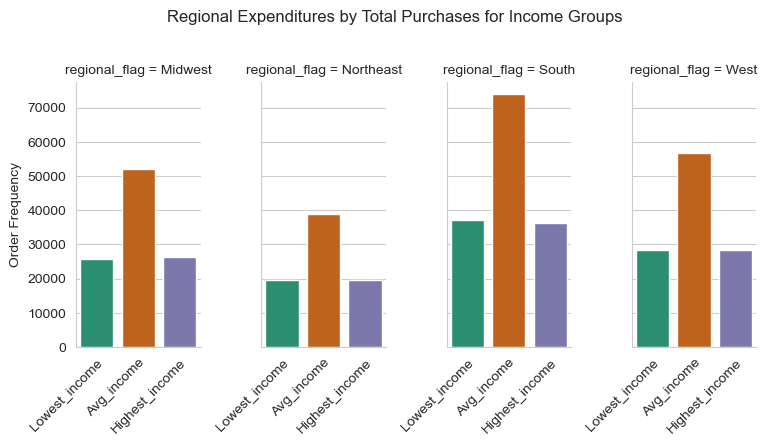

In [38]:
# Creating a FacetGrid for income_group and Total Purchases, with separate plots for regional_flag

g = sns.FacetGrid(df_income_group_sample_agg, col="regional_flag", height=4, aspect=.5)
g.map(sns.barplot, "income_group", "order_id", palette='Dark2', ci=None, order=['Lowest_income', 'Avg_income', 'Highest_income'])

g.set_xticklabels(rotation=45, rotation_mode='anchor', ha='right')
g.set_axis_labels("", "Order Frequency")
g.fig.suptitle("Regional Expenditures by Total Purchases for Income Groups")
g.figure.subplots_adjust(top=.8)

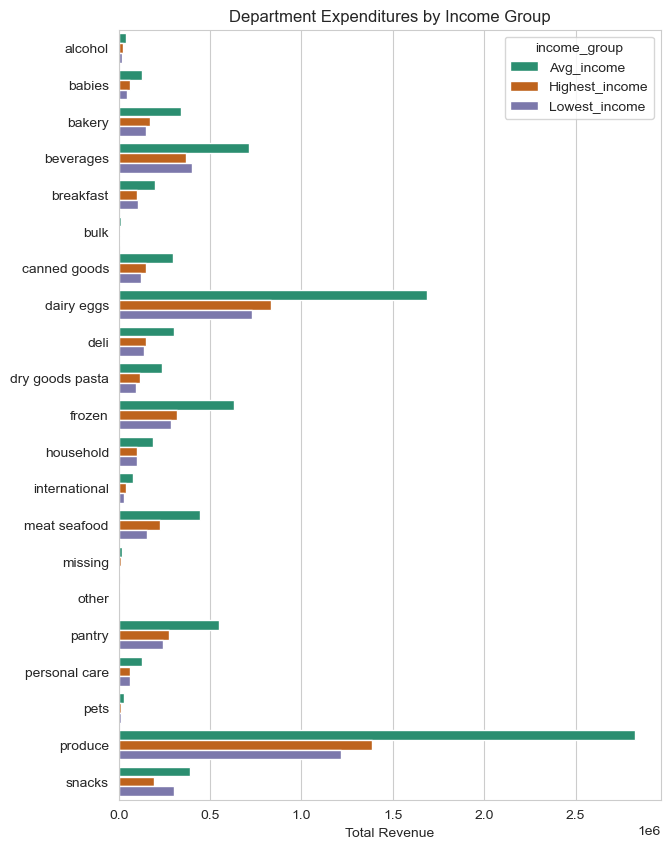

In [39]:
# Creating a barplot of department expenditures by income group

plt.figure(figsize=(7, 10))

sns.barplot(data=df_income_group_sample_agg, 
            x='prices',          
            y='department', 
            hue='income_group', 
            palette='Dark2',
            estimator=np.mean,
            ci=None
           )

plt.title("Department Expenditures by Income Group")
plt.xlabel("Total Revenue")
plt.ylabel("")
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_group_department_Expenditures.png'))
plt.show()

<Figure size 700x1000 with 0 Axes>

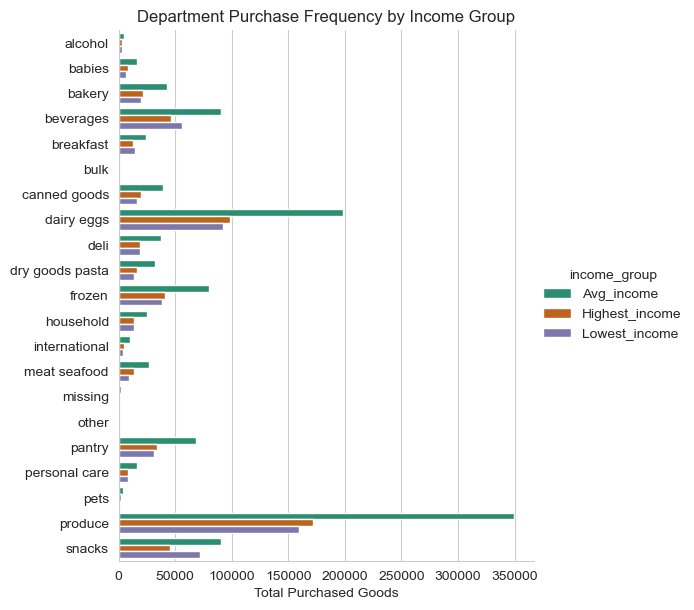

In [40]:
# Creating a barplot of department purchase frequency by income group

plt.figure(figsize=(7, 10))

sns.catplot(data=df_income_group_sample_agg,          
            kind="bar", 
            x='order_id',
            y='department',  
            hue='income_group', 
            errorbar="sd",
            palette='Dark2',
            height=6,
            ci=None
           )

plt.title("Department Purchase Frequency by Income Group")
plt.xlabel("Total Purchased Goods")
plt.ylabel("")
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_group_freq_purchases.png'))
plt.show()

## Income Group: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [41]:
# Aggregated Data from TOTAL Dataset for income_group
df_opd.groupby('income_group').agg({'max_order': ['mean', 'max', 'min'], 'prices': ['sum', 'mean', 'max', 'min']})

max_order               prices                
                    mean max min          sum mean   max  min
income_group                                                 
Avg_income         34.70  99   5 123345721.10 7.96 25.00 1.00
Highest_income     34.61  99   5  61604110.30 7.96 25.00 1.00
Lowest_income      33.70  99   5  56609603.40 7.31 25.00 1.00

# User Profile for Family Size

## Family Size: Creating Flag for Family Status

In [42]:
# Check the value counts of the 'num_of_dependants' column
df_opd['num_of_dependants'].value_counts()

num_of_dependants
3    7779452
0    7747032
2    7740199
1    7725981
Name: count, dtype: int64

In [43]:
# Check the value counts of the 'marital_status' column
df_opd['marital_status'].value_counts()

marital_status
married                             21763021
single                               5099271
divorced/widowed                     2647761
living with parents and siblings     1482611
Name: count, dtype: int64

In [44]:
# Creating User flag for family_size based on marital_status and num_of_dependants

# Define conditions for each family size category
conditions = [
    (df_opd['marital_status'] == 'married') & (df_opd['num_of_dependants'] == 0),
    (df_opd['marital_status'] == 'married') & (df_opd['num_of_dependants'] >= 1),
    (df_opd['marital_status'] == 'single') & (df_opd['num_of_dependants'] >= 1),
    (df_opd['marital_status'] == 'single') & (df_opd['num_of_dependants'] == 0),
    (df_opd['marital_status'] == 'divorced/widowed') & (df_opd['num_of_dependants'] == 0),
    (df_opd['marital_status'] == 'divorced/widowed') & (df_opd['num_of_dependants'] >= 1),
    (df_opd['marital_status'] == 'living with parents and siblings') & (df_opd['num_of_dependants'] == 0),
    (df_opd['marital_status'] == 'living with parents and siblings') & (df_opd['num_of_dependants'] >= 1)
]

# Define corresponding family size categories
choices = [
    'Married_no_kids',
    'Married_kids',
    'Single_kids',
    'Single_no_kids',
    'Divorced/widowed_no_kids',
    'Divorced/widowed_kids',
    'Living with family_no_kids',
    'Living with family_kids'
]

# Create a new 'family_size' column based on the conditions and choices
df_opd['family_size'] = np.select(conditions, choices, default='Unknown')

# Checking for NaN values
df_opd['family_size'].value_counts(dropna=False)

family_size
Married_kids                21763021
Single_no_kids               5099271
Divorced/widowed_no_kids     2647761
Living with family_kids      1482611
Name: count, dtype: int64

In [45]:
# Checking total row count
total_row_count = df_opd.shape[0]
print('Total number of rows in df_opd:', total_row_count)

Total number of rows in df_opd: 30992664


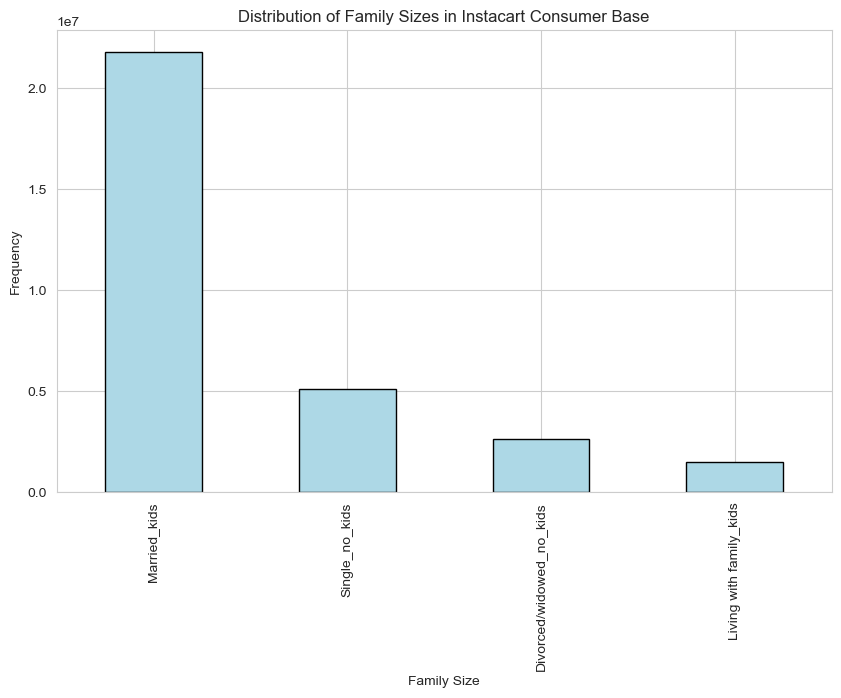

In [46]:
# Create a bar chart of the distribution of family sizes
family_size_bar = df_opd['family_size'].value_counts().plot(kind='bar', figsize=(10, 6), color='lightblue', edgecolor='black')

# Add labels to the x and y axes
family_size_bar.set_xlabel('Family Size')
family_size_bar.set_ylabel('Frequency')

# Add a descriptive title to the chart
family_size_bar.set_title('Distribution of Family Sizes in Instacart Consumer Base')

# Save the chart as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_size_distribution.png'))

# Show the chart
plt.show()

In [47]:
# Set seed for reproducibility
np.random.seed(4)

# Generate a boolean mask for selecting rows
mask = np.random.rand(len(df_opd)) < 0.7

# Split the DataFrame into two parts based on the mask
df_opd_big3 = df_opd[mask]
df_opd_small3 = df_opd[~mask]

# Quality check: Ensure that the total length matches the original DataFrame's length
assert len(df_opd_big3) + len(df_opd_small3) == len(df_opd), "Split does not add up to original DataFrame length"

# Print the lengths for verification
print(f"Big dataset length: {len(df_opd_big3)}")
print(f"Small dataset length: {len(df_opd_small3)}")
print(f"Original dataset length: {len(df_opd)}")

Big dataset length: 21695653
Small dataset length: 9297011
Original dataset length: 30992664


## Family Size: Profile Creation

In [48]:
# Selecting necessary columns for analysis from the 30% sample dataset
columns_to_include = [
    'family_size', 'income', 'orders_day_of_week', 
    'order_hour_of_day', 'department', 'prices', 
    'order_id', 'regional_flag'
]

# Creating a new DataFrame with the selected columns
df_family_size_sample = df_opd_small3[columns_to_include]

# Displaying the first few rows of the new DataFrame for a quick overview
df_family_size_sample.head()

,family_size,income,orders_day_of_week,order_hour_of_day,department,prices,order_id,regional_flag
0,Married_kids,40423,2,8,beverages,9.00,2539329,South
2,Married_kids,40423,3,12,beverages,9.00,473747,South
3,Married_kids,40423,4,7,beverages,9.00,2254736,South
6,Married_kids,40423,1,9,beverages,9.00,550135,South
10,Married_kids,40423,1,14,beverages,13.40,3108588,South


## Family Size: Visualizations

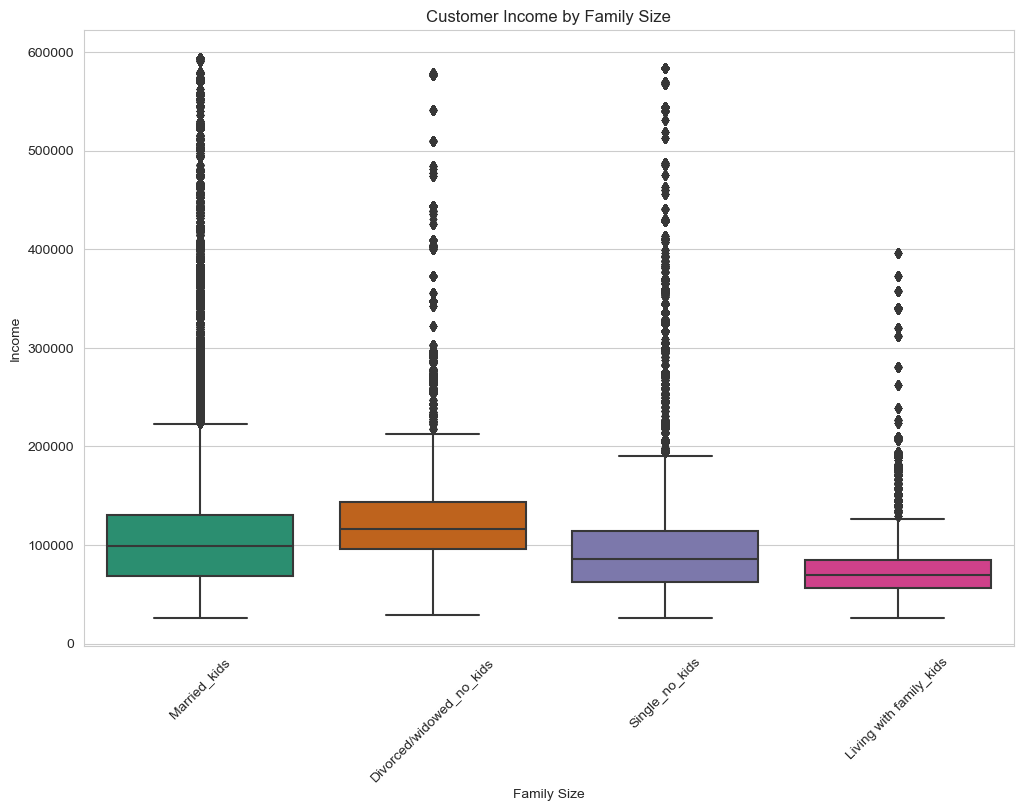

In [49]:
# Setting the plot size for better visibility
plt.figure(figsize=(12, 8))

# Creating box plot
box_plot = sns.boxplot(data=df_family_size_sample, x='family_size', y='income', palette='Dark2')

# Setting the title and labels
box_plot.set_title('Customer Income by Family Size')
box_plot.set_xlabel('Family Size')
box_plot.set_ylabel('Income')

# Rotating x-ticks for better readability
plt.xticks(rotation=45)

# Saving the plot before calling plt.show()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations','Family_size_income_boxplot.png'))

# Display the plot
plt.show()

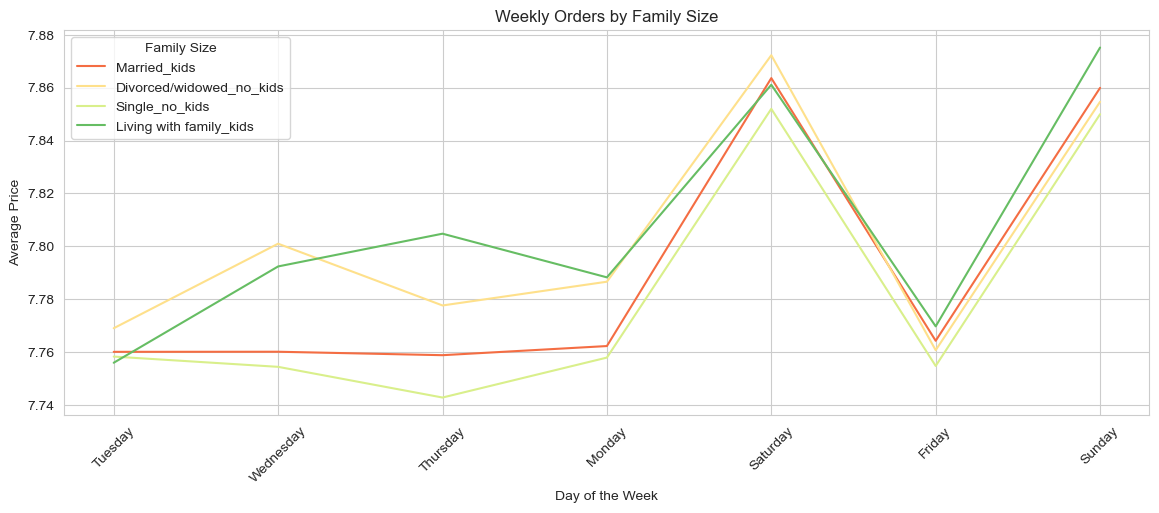

In [50]:
# Map the day of the week from numbers to names
days_of_week = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
df_family_size_sample['orders_day_of_week'] = df_family_size_sample['orders_day_of_week'].map(days_of_week)

# Set the figure size
plt.figure(figsize=(14, 5))

# Create a line plot
sns.lineplot(
    data=df_family_size_sample, 
    x='orders_day_of_week', 
    y='prices', 
    hue='family_size', 
    palette='RdYlGn',
    ci=None
)

# Set title and labels
plt.title("Weekly Orders by Family Size")
plt.xlabel("Day of the Week")
plt.ylabel("Average Price")

# Add a legend title
plt.legend(title='Family Size')

# Ensure the days are displayed in the correct order
plt.xticks(rotation=45)

# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_size_dow.png'))

# Show the plot
plt.show()

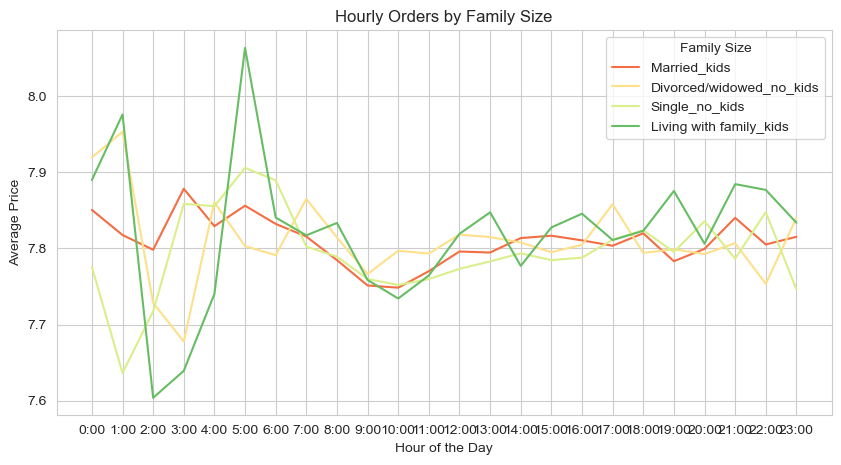

In [51]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Create a line plot
sns.lineplot(
    data=df_family_size_sample, 
    x='order_hour_of_day', 
    y='prices', 
    hue='family_size', 
    palette='RdYlGn',
    ci=None
)

# Set title and labels
plt.title("Hourly Orders by Family Size")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Price")  # Replace with an appropriate label

# Ensure the hours are displayed in the correct format
plt.xticks(range(0, 24), [f"{hour}:00" for hour in range(0, 24)])

# Show the legend with a title
plt.legend(title='Family Size')

# Save the figure just before showing it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_size_HOD.png'))

# Show the plot
plt.show()

## Family Size: Regional Flag and Department Analysis

In [52]:
# Aggregate 'order_id' as count and 'prices' as sum based on 'department', 'family_size', and 'regional_flag'
df_family_size_sample_agg = df_family_size_sample.groupby(
    ['department', 'family_size', 'regional_flag'], as_index=False
).agg(
    order_id_count=('order_id', 'count'),  # Naming the aggregated columns for clarity
    prices_sum=('prices', 'sum')
)

# Display the first 3 rows of the aggregated DataFrame
df_family_size_sample_agg.head(3)

,department,family_size,regional_flag,order_id_count,prices_sum
0,alcohol,Divorced/widowed_no_kids,Midwest,905,7479.60
1,alcohol,Divorced/widowed_no_kids,Northeast,529,4258.80
2,alcohol,Divorced/widowed_no_kids,South,1185,9147.40


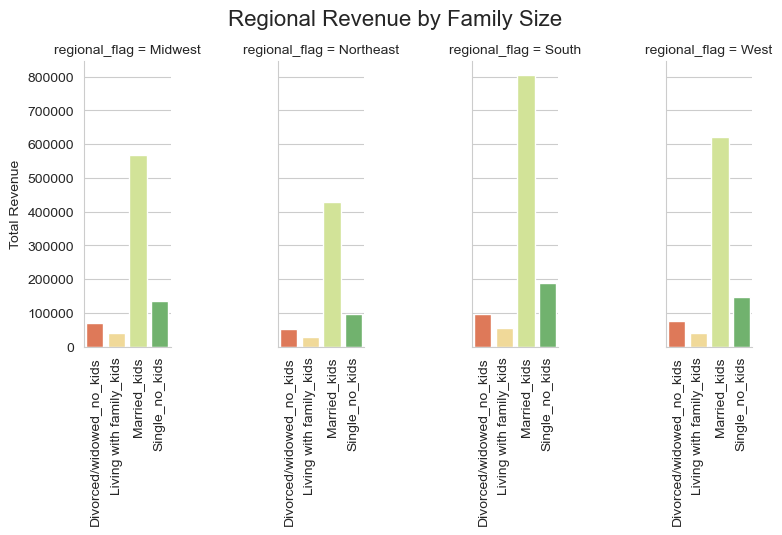

In [53]:
# Create a FacetGrid with regional flags as columns, setting the height and aspect ratio
g = sns.FacetGrid(df_family_size_sample_agg, col="regional_flag", height=4, aspect=.5)

# Map a barplot onto each facet, specifying the family_size as x and the total revenue as y
g.map(sns.barplot, "family_size", "prices_sum", palette='RdYlGn', ci=None, order=sorted(df_family_size_sample_agg['family_size'].unique()))

# Rotate the x-axis labels for each facet to vertical for better readability
g.set_xticklabels(rotation=90)

# Set common y-axis label as 'Total Revenue'
g.set_axis_labels("", "Total Revenue")

# Set the main title of the FacetGrid
g.fig.suptitle("Regional Revenue by Family Size", size=16)

# Adjust subplots to fit the main title
g.figure.subplots_adjust(top=0.85)

# Remove the x-axis label 'Family Size' from all but the first facet
for ax in g.axes.flatten()[1:]:
    ax.set_xlabel('')

# Show the plot
plt.show()

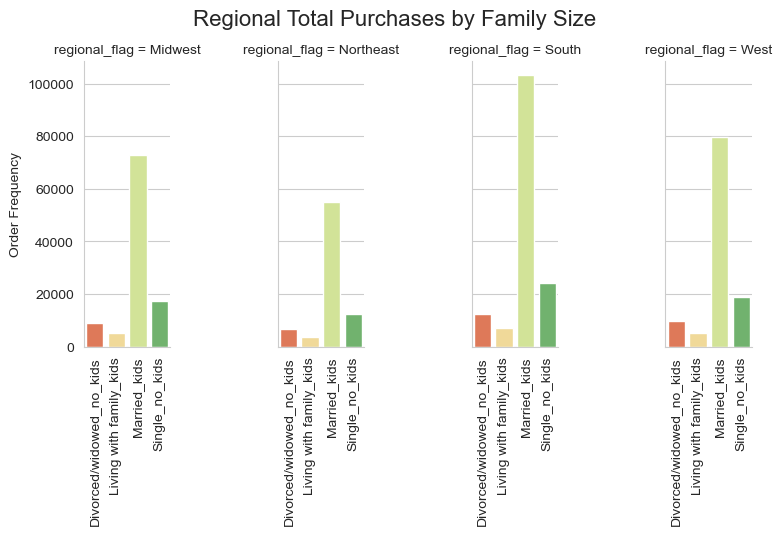

In [54]:
# Create a FacetGrid with 'regional_flag' as columns, setting the height and aspect ratio
g = sns.FacetGrid(df_family_size_sample_agg, col="regional_flag", height=4, aspect=.5)

# Map a barplot onto each facet, specifying 'family_size' as x and 'order_id' as y
# 'order_id' should represent the count of orders here
g.map(sns.barplot, "family_size", "order_id_count", palette='RdYlGn', ci=None, order=sorted(df_family_size_sample_agg['family_size'].unique()))

# Rotate the x-axis labels for each facet to vertical for better readability
g.set_xticklabels(rotation=90)

# Set common y-axis label as 'Order Frequency'
g.set_axis_labels("", "Order Frequency")

# Set the main title of the FacetGrid
g.fig.suptitle("Regional Total Purchases by Family Size", size=16)

# Adjust subplots to fit the main title
g.figure.subplots_adjust(top=0.85)

# Remove the x-axis label 'Family Size' from all but the first facet
for ax in g.axes.flatten()[1:]:
    ax.set_xlabel('')

# Show the plot
plt.show()

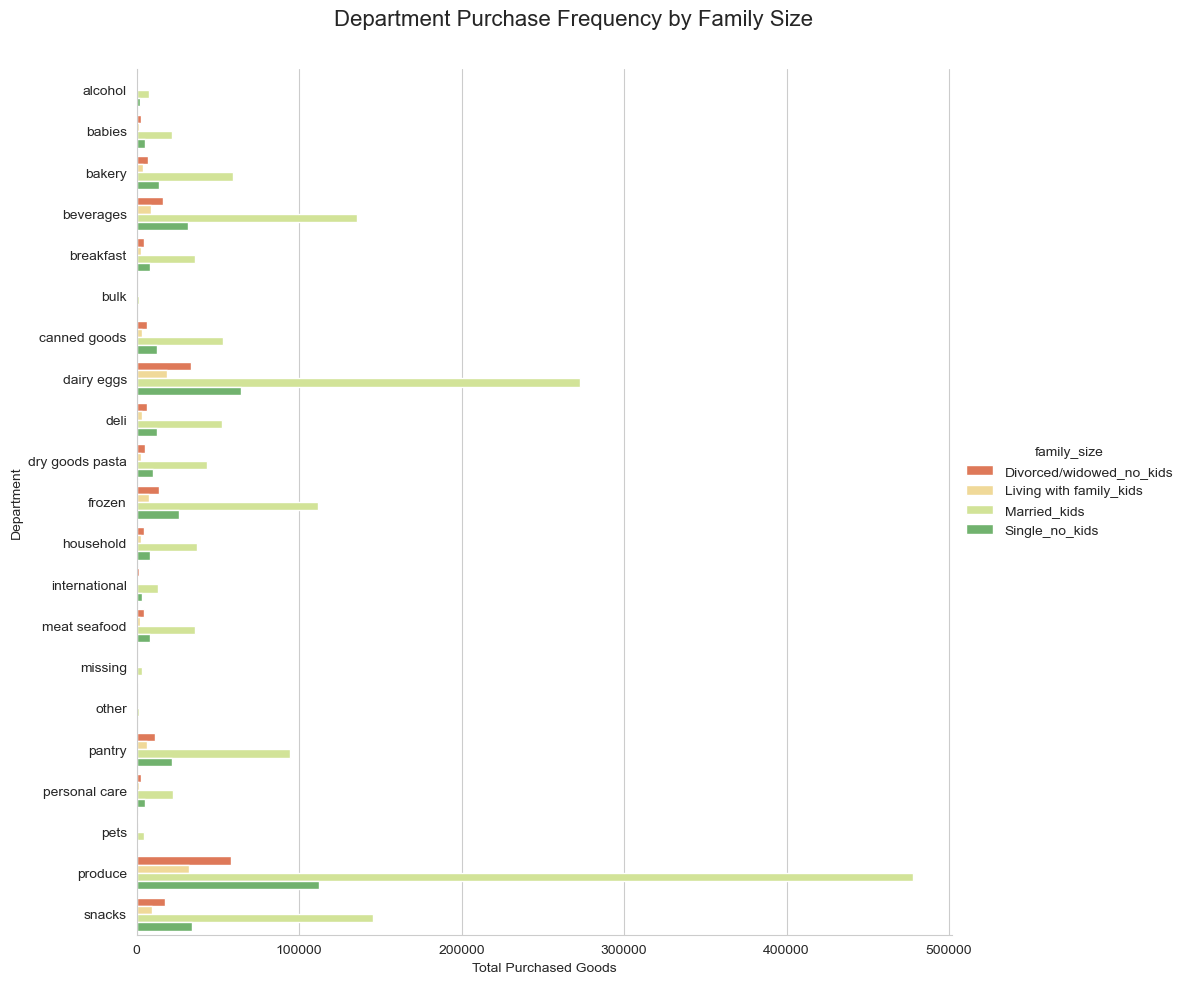

In [55]:
# Create a bar plot using sns.catplot
cat_plot = sns.catplot(data=df_family_size_sample_agg,          
                       kind="bar", 
                       x='order_id_count',  
                       y='department',  
                       hue='family_size', 
                       palette='RdYlGn',
                       height=10,  
                       ci=None
                      )

# Set the axis titles
cat_plot.set_axis_labels("Total Purchased Goods", "Department")

# Set the overall title
cat_plot.fig.suptitle("Department Purchase Frequency by Family Size", size=16)

# Adjust the layout to make space for the title
cat_plot.fig.subplots_adjust(top=0.92)

# Save the figure
cat_plot.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_size_freq_purchases.png'))

# Show the plot
plt.show()

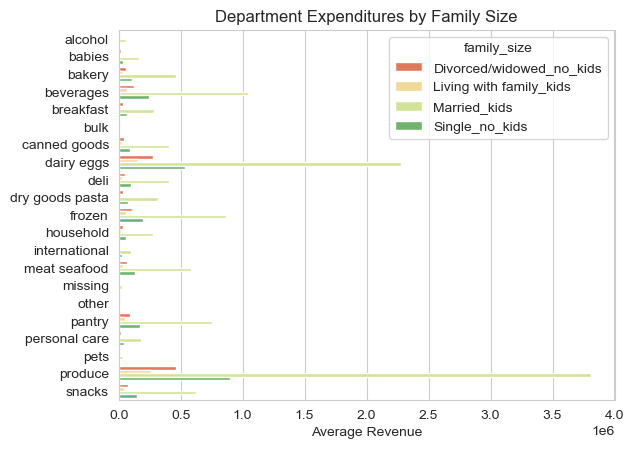

In [56]:
# Create a bar plot using sns.barplot
sns.barplot(data=df_family_size_sample_agg, 
            x='prices_sum',  
            y='department', 
            hue='family_size', 
            palette='RdYlGn',
            estimator=np.mean,
            ci=None
           )

# Set the title and axis labels
plt.title("Department Expenditures by Family Size")
plt.xlabel("Average Revenue")  
plt.ylabel("")  

# Save the figure before plt.show(), after setting all the figure parameters
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_size_department_Expenditures.png'))

# Show the plot
plt.show()

# Family Size: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [57]:
# Aggregated Data from TOTAL Dataset for family_size
df_opd.groupby('family_size').agg({'max_order': ['mean','max','min'], 'prices': ['sum','mean','max','min']})

max_order               prices                
                              mean max min          sum mean   max  min
family_size                                                            
Divorced/widowed_no_kids     34.71  99   5  20664984.20 7.81 25.00 1.00
Living with family_kids      34.85  99   5  11571486.00 7.81 25.00 1.00
Married_kids                 34.31  99   5 169613076.80 7.79 25.00 1.00
Single_no_kids               34.66  99   5  39709887.80 7.79 25.00 1.00

# User Profile Loyalty Flag

## Loyalty Flag: Creation of Profile

In [58]:
# Create a subset dataframe from df_opd_small3 for loyalty analysis, selecting relevant columns
df_loyalty_sample = df_opd_small3[[
    'loyalty_flag', 'orders_day_of_week', 'days_since_prior_order', 
    'order_hour_of_day', 'department', 'prices', 'order_id', 'regional_flag'
]]

# Display the first five entries of the df_loyalty_sample dataframe to verify correct column selection
df_loyalty_sample.head()

,loyalty_flag,orders_day_of_week,days_since_prior_order,order_hour_of_day,department,prices,order_id,regional_flag
0,New customer,2,NaN,8,beverages,9.00,2539329,South
2,New customer,3,21.00,12,beverages,9.00,473747,South
3,New customer,4,29.00,7,beverages,9.00,2254736,South
6,New customer,1,20.00,9,beverages,9.00,550135,South
10,New customer,1,14.00,14,beverages,13.40,3108588,South


## Loyalty Flag: Visualizations

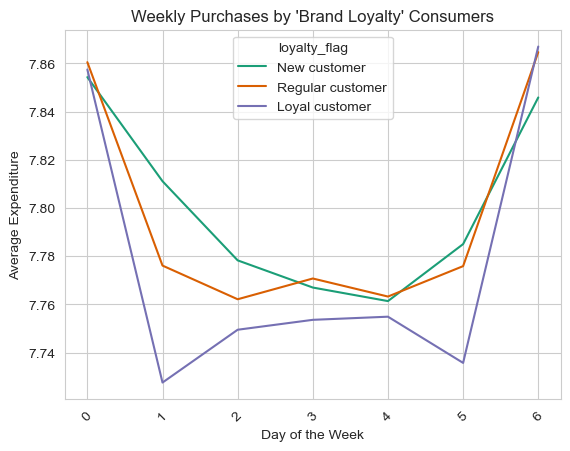

In [59]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create the lineplot with seaborn
sns.lineplot(
    data=df_loyalty_sample, 
    x='orders_day_of_week', 
    y='prices', 
    hue='loyalty_flag', 
    palette='Dark2',
    ci=None
)

# Set the plot title and labels
plt.title("Weekly Purchases by 'Brand Loyalty' Consumers")
plt.xlabel("Day of the Week")
plt.ylabel("Average Expenditure") 

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Loyalty_dow.png'))

# Display the plot
plt.show()

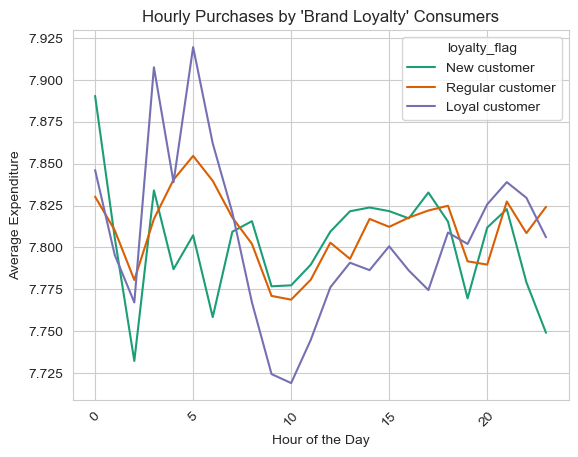

In [60]:
# Create the lineplot with seaborn
sns.lineplot(
    data=df_loyalty_sample, 
    x='order_hour_of_day', 
    y='prices', 
    hue='loyalty_flag', 
    palette='Dark2',
    ci=None
)

# Set the plot title and labels
plt.title("Hourly Purchases by 'Brand Loyalty' Consumers")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Expenditure")  

# Rotate x-axis labels 
plt.xticks(rotation=45)

# Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_HOD.png'))

# Display the plot
plt.show()

## Loyalty Flag: Regional Flag and Department Analysis

In [61]:
# Aggregating 'order_id' and 'prices' from sample
df_loyalty_sample_agg = df_loyalty_sample.groupby(['department', 'loyalty_flag','regional_flag'], as_index=False).agg({'order_id': 'count', 'prices': 'sum'})
df_loyalty_sample_agg.head(3)

,department,loyalty_flag,regional_flag,order_id,prices
0,alcohol,Loyal customer,Midwest,2765,22494.50
1,alcohol,Loyal customer,Northeast,1931,15134.00
2,alcohol,Loyal customer,South,4015,33714.60


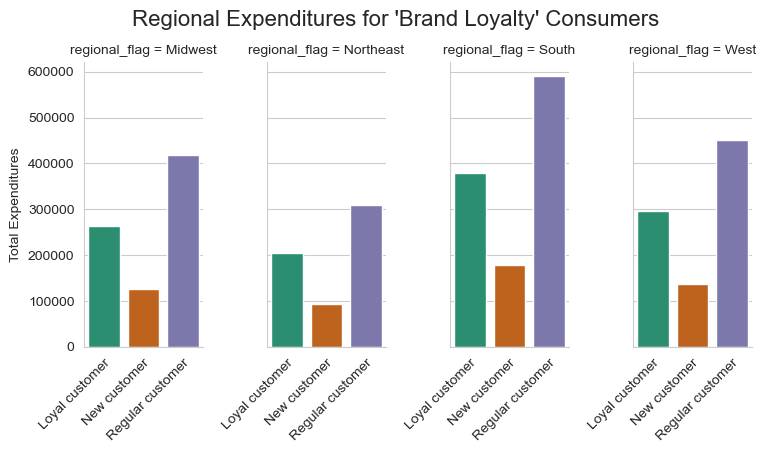

In [62]:
# Create a FacetGrid for each 'regional_flag', setting the height and aspect ratio
g = sns.FacetGrid(df_loyalty_sample_agg, col="regional_flag", height=4, aspect=.5)

# Map a bar plot onto each facet with 'loyalty_flag' on the x-axis and total 'prices' on the y-axis
g.map(sns.barplot, "loyalty_flag", "prices", palette='Dark2', ci=None) 

# Rotate the x-axis labels for better readability and alignment
g.set_xticklabels(rotation=45, rotation_mode='anchor', ha='right')

# Set the y-axis label to 'Total Expenditures'
g.set_axis_labels("", "Total Expenditures")

# Set the main title of the FacetGrid
g.fig.suptitle("Regional Expenditures for 'Brand Loyalty' Consumers", size=16)

# Adjust the layout to fit the main title
g.figure.subplots_adjust(top=0.85)

# Show the plot
plt.show()

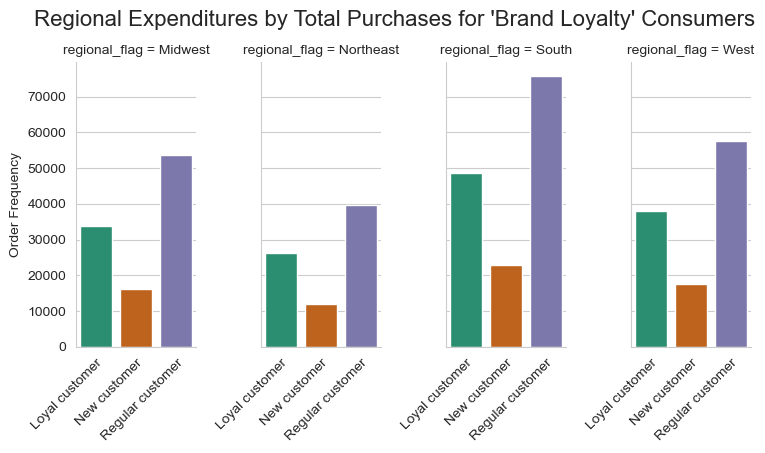

In [63]:
# Create a FacetGrid for each 'regional_flag', setting the height and aspect ratio
g = sns.FacetGrid(df_loyalty_sample_agg, col="regional_flag", height=4, aspect=.5)

# Map a bar plot onto each facet with 'loyalty_flag' on the x-axis and 'order_id' on the y-axis
g.map(sns.barplot, "loyalty_flag", "order_id", palette='Dark2', ci=None)  
# Rotate the x-axis labels for better readability and alignment
g.set_xticklabels(rotation=45, rotation_mode='anchor', ha='right')

# Set the y-axis label to 'Order Frequency'
g.set_axis_labels("", "Order Frequency")

# Set the main title of the FacetGrid
g.fig.suptitle("Regional Expenditures by Total Purchases for 'Brand Loyalty' Consumers", size=16)

# Adjust the layout to fit the main title
g.figure.subplots_adjust(top=0.85)

# Show the plot
plt.show()

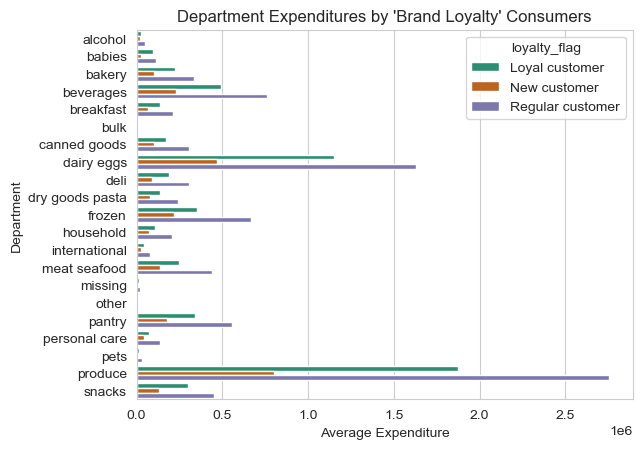

In [64]:
# Create a bar plot using seaborn
sns.barplot(
    data=df_loyalty_sample_agg, 
    x='prices', 
    y='department', 
    hue='loyalty_flag', 
    palette='Dark2',
    estimator=np.mean,  
    ci=None
)

# Set the title and axis labels
plt.title("Department Expenditures by 'Brand Loyalty' Consumers")
plt.xlabel("Average Expenditure") 
plt.ylabel("Department")

# Save the plot before displaying it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_department_Expenditures.png'))

# Show the plot
plt.show()

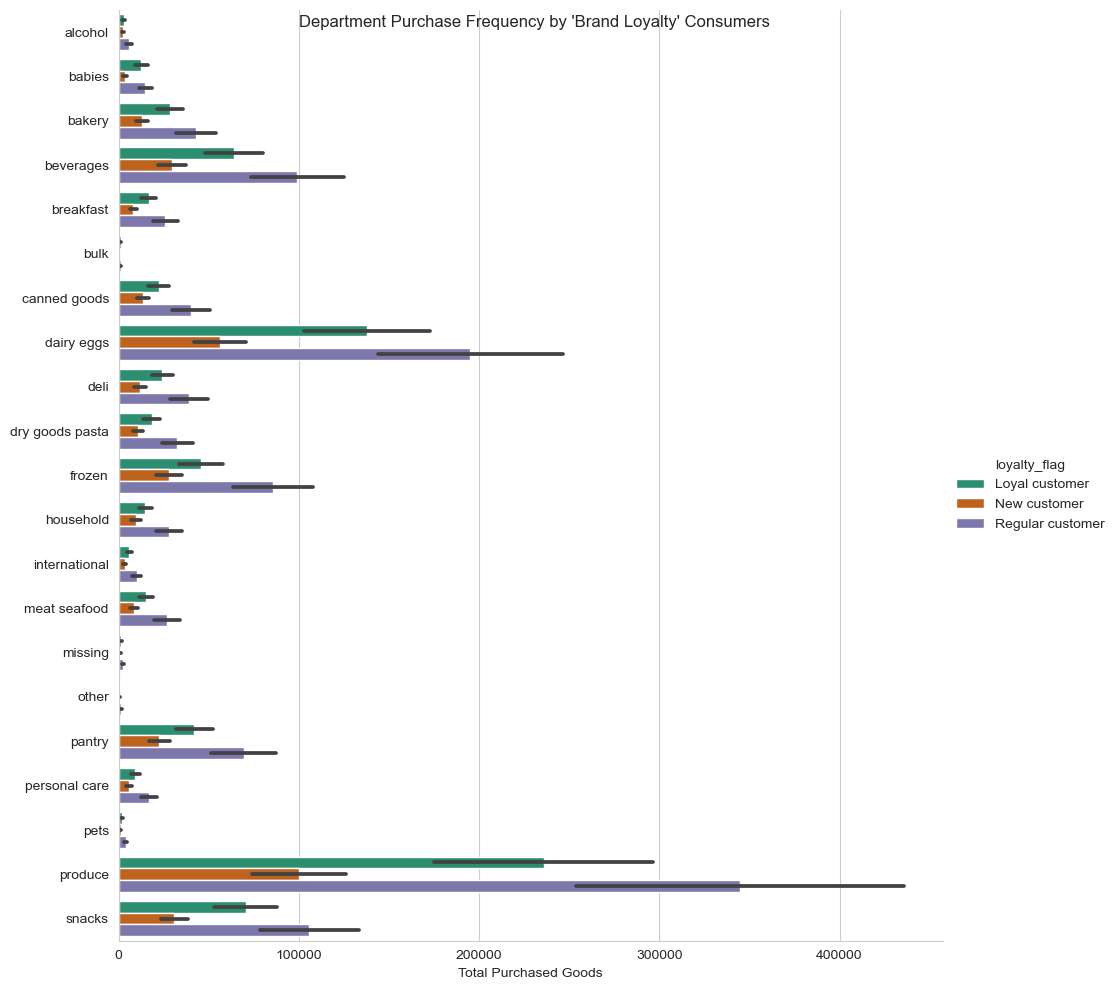

In [65]:
# Create a bar plot using seaborn catplot
cat_plot = sns.catplot(
    data=df_loyalty_sample_agg,          
    kind="bar", 
    x='order_id', 
    y='department',  
    hue='loyalty_flag', 
    palette='Dark2',
    height=10, 
    ci='sd'  
)

# Set the title and axis labels
cat_plot.fig.suptitle("Department Purchase Frequency by 'Brand Loyalty' Consumers")
cat_plot.set_axis_labels("Total Purchased Goods", "")

# Save the figure
cat_plot.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_freq_purchases.png'))

# Show the plot
plt.show()

## Loyalty Flag: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [66]:
# Aggregated Data from TOTAL Dataset for loyalty_flag
df_opd.groupby('loyalty_flag').agg({'max_order': ['mean','max','min'], 'prices': ['sum','mean','max','min']})

max_order               prices                
                      mean max min          sum mean   max  min
loyalty_flag                                                   
Loyal customer       63.98  99  41  80058811.90 7.78 25.00 1.00
New customer          7.49  10   5  37523586.80 7.81 25.00 1.00
Regular customer     23.43  40  11 123977036.10 7.80 25.00 1.00

# Department and Product Further Analysis

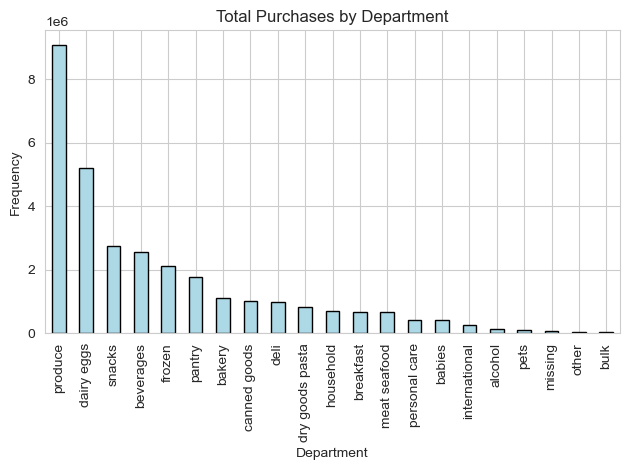

In [67]:
# Count the frequency of each department
department_counts = df_opd['department'].value_counts()

# Create a bar plot for the department frequency count
department_bar_count = department_counts.plot.bar(
    title='Total Purchases by Department', 
    xlabel='Department', 
    ylabel='Frequency', 
    color='lightblue', 
    edgecolor='black'
)

# Set a tight layout for the plot
plt.tight_layout()

# Save the bar chart as a PNG file
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_bar_count.png'))

# Show the plot
plt.show()

## Department: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [68]:
# Aggregated Data from TOTAL Dataset for department
df_opd.groupby('department').agg({'max_order': ['mean','max','min'], 'prices': ['mean','sum','max','min'], 'orders_day_of_week': ['mean'], 'order_hour_of_day': ['mean', 'min', 'max']})

max_order         prices                         \
                     mean max min   mean         sum   max  min   
department                                                        
alcohol             31.64  99   5   8.15  1179302.30 15.00 1.00   
babies              39.00  99   5   7.63  3133096.40 15.00 1.00   
bakery              34.82  99   5   7.87  8852224.60 15.00 1.00   
beverages           34.52  99   5   7.68 19759202.30 15.00 1.00   
breakfast           34.20  99   5   8.07  5470900.40 14.90 1.00   
bulk                39.04  99   5   8.35   279212.80 14.10 1.40   
canned goods        31.81  99   5   7.55  7637778.50 15.00 1.00   
dairy eggs          35.64  99   5   8.35 43328054.40 15.00 1.00   
deli                33.76  99   5   7.78  7813188.10 15.00 1.00   
dry goods pasta     32.14  99   5   7.35  6042181.40 15.00 1.00   
frozen              31.76  99   5   7.74 16431750.70 15.00 1.00   
household           31.39  99   5   7.38  5164912.00 15.00 1.00   
international       33.04  99   5   7.68  1965702.90 15.00 1.00   
meat seafood        32.52  99   5  16.30 10999037.00 25.00 8.00   
missing             31.17  99   5   8.66   560933.30 15.00 1.00   
other               33.46  99   5   6.96   239569.20 15.00 1.10   
pantry              33.51  99   5   8.01 14289860.70 20.00 1.00   
personal care       32.01  99   5   8.00  3394733.10 15.00 1.00   
pets                30.90  99   5   7.89   734083.70 15.00 1.00   
produce             35.37  99   5   7.98 72455790.70 15.00 1.00   
snacks              34.74  99   5   4.28 11827920.30  7.00 1.60   

                orders_day_of_week order_hour_of_day          
                              mean              mean min max  
department                                                    
alcohol                       3.17             13.58   0  23  
babies                        2.71             13.39   0  23  
bakery                        2.75             13.38   0  23  
beverages                     2.81             13.30   0  23  
breakfast                     2.73             13.31   0  23  
bulk                          2.76             13.44   0  23  
canned goods                  2.71             13.44   0  23  
dairy eggs                    2.74             13.35   0  23  
deli                          2.71             13.47   0  23  
dry goods pasta               2.69             13.53   0  23  
frozen                        2.79             13.67   0  23  
household                     2.84             13.34   0  23  
international                 2.69             13.50   0  23  
meat seafood                  2.72             13.46   0  23  
missing                       2.80             13.44   0  23  
other                         2.85             13.49   0  23  
pantry                        2.81             13.44   0  23  
personal care                 2.82             13.48   0  23  
pets                          2.93             13.57   0  23  
produce                       2.69             13.41   0  23  
snacks                        2.75             13.35   0  23

## Top 10 Produce Items subset

In [69]:
# Creating df_popular_products
df_popular_products = df_opd.loc[df_opd['department'].isin(['produce'])]
df_popular_products.shape

(9079276, 39)

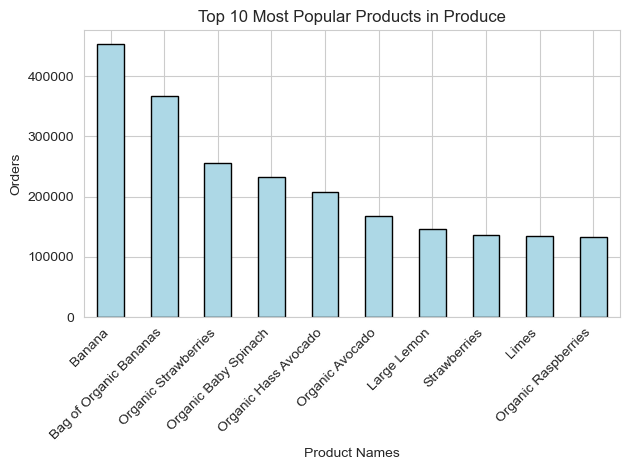

In [70]:
# Get the counts of the top 10 most popular products
top_10_popular_products = df_popular_products['product_name'].value_counts().head(10)

# Create a bar chart for the top 10 most popular products
popular_products_barchart = top_10_popular_products.plot.bar(
    title='Top 10 Most Popular Products in Produce', 
    xlabel='Product Names', 
    ylabel='Orders', 
    color='lightblue', 
    edgecolor='black'
)

# Rotate x-axis labels for better readability 
plt.xticks(rotation=45, ha='right')

# Set a tight layout for the plot
plt.tight_layout()

# Save the bar chart as a PNG file
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'popular_products_barchart.png'))

# Show the plot
plt.show()

# Exporting Data

In [71]:
# Final Column Check
df_opd

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,order_frequency,order_frequency_flag,first_name,surname,gender,state,age,date_joined,num_of_dependants,marital_status,income,regional_flag,Customer_activity,department,merge_indicator,age_group,income_group,family_size
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77,7,9.00,Mid-range product,Regularly busy,Average orders,10,New customer,6.37,low spender,20.50,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Active,beverages,both,28_37,Lowest_income,Married_kids
1,2398795,1,2,3,7,15.00,196,1,1,both,Soda,77,7,9.00,Mid-range product,Least busy,Average orders,10,New customer,6.37,low spender,20.50,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Active,beverages,both,28_37,Lowest_income,Married_kids
2,473747,1,3,3,12,21.00,196,1,1,both,Soda,77,7,9.00,Mid-range product,Least busy,Average orders,10,New customer,6.37,low spender,20.50,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Active,beverages,both,28_37,Lowest_income,Married_kids
3,2254736,1,4,4,7,29.00,196,1,1,both,Soda,77,7,9.00,Mid-range product,Least busy,Average orders,10,New customer,6.37,low spender,20.50,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Active,beverages,both,28_37,Lowest_income,Married_kids
4,431534,1,5,4,15,28.00,196,1,1,both,Soda,77,7,9.00,Mid-range product,Least busy,Average orders,10,New customer,6.37,low spender,20.50,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Active,beverages,both,28_37,Lowest_income,Married_kids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30992659,525976,58201,24,6,16,3.00,5161,1,1,both,Dried Mango,18,10,6.10,Mid-range product,Regularly busy,Average orders,28,Regular customer,7.69,low spender,13.00,Regular customer,Todd,Khan,Male,Florida,75,2/8/2019,2,married,138066,South,Active,bulk,both,68_over,Highest_income,Married_kids
30992660,758290,58201,26,0,12,9.00,5161,1,1,both,Dried Mango,18,10,6.10,Mid-range product,Busiest day,Average orders,28,Regular customer,7.69,low spender,13.00,Regular customer,Todd,Khan,Male,Florida,75,2/8/2019,2,married,138066,South,Active,bulk,both,68_over,Highest_income,Married_kids
30992661,460711,58201,27,6,9,13.00,5161,1,1,both,Dried Mango,18,10,6.10,Mid-range product,Regularly busy,Average orders,28,Regular customer,7.69,low spender,13.00,Regular customer,Todd,Khan,Male,Florida,75,2/8/2019,2,married,138066,South,Active,bulk,both,68_over,Highest_income,Married_kids
30992662,1605789,58201,28,5,7,27.00,5161,1,1,both,Dried Mango,18,10,6.10,Mid-range product,Regularly busy,Average orders,28,Regular customer,7.69,low spender,13.00,Regular customer,Todd,Khan,Male,Florida,75,2/8/2019,2,married,138066,South,Active,bulk,both,68_over,Highest_income,Married_kids


In [72]:
# Export orders_products_departments
df_opd.to_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'orders_products_departments.pkl'))